# Car Price Prediction

#### **Author:** Areeba Anwaar

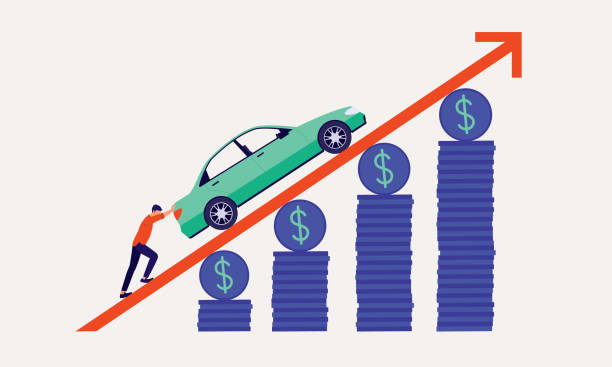

## Objectives
Through this notebook, We'll explore the dataset, aiming to test the logistic regression model we made from scratch with the one from scikit. 

## About the dataset
The dataset used is [here](https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars/data), which includes variables: Car Name, Year, Selling Price, Present Price, Driven kms, Fuel Type, Selling type, Transmission, and number of Owners.

## Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import linear_regression as lgr
plt.style.use('ggplot')

## Basic EDA

Reading the csv file

In [3]:
car_df=pd.read_csv("car data.csv")

Analyzing the dataset

In [4]:
print(car_df.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [5]:
print(car_df.tail())


    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
296     city  2016           9.50           11.6       33988    Diesel   
297     brio  2015           4.00            5.9       60000    Petrol   
298     city  2009           3.35           11.0       87934    Petrol   
299     city  2017          11.50           12.5        9000    Diesel   
300     brio  2016           5.30            5.9        5464    Petrol   

    Selling_type Transmission  Owner  
296       Dealer       Manual      0  
297       Dealer       Manual      0  
298       Dealer       Manual      0  
299       Dealer       Manual      0  
300       Dealer       Manual      0  


In [6]:
print(car_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [7]:
print(car_df.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


Checking for duplicates

In [8]:
duplicate_rows = car_df[car_df.duplicated(keep=False)]
print("\n\nDuplicate rows:\n",duplicate_rows)



Duplicate rows:
     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
15    ertiga  2016           7.75          10.79       43000    Diesel   
17    ertiga  2016           7.75          10.79       43000    Diesel   
51  fortuner  2015          23.00          30.61       40000    Diesel   
93  fortuner  2015          23.00          30.61       40000    Diesel   

   Selling_type Transmission  Owner  
15       Dealer       Manual      0  
17       Dealer       Manual      0  
51       Dealer    Automatic      0  
93       Dealer    Automatic      0  


Removing the duplicate rows

In [9]:
car_df=car_df.drop_duplicates()


Checking for null values


In [10]:
print("\nNull values:\n",car_df.isnull().sum())


Null values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


One hot encoding data for later use


In [11]:
car_df_encoded = pd.get_dummies(car_df, columns=['Fuel_Type','Selling_type','Transmission'])
print(car_df_encoded.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Owner  \
0     ritz  2014           3.35           5.59       27000      0   
1      sx4  2013           4.75           9.54       43000      0   
2     ciaz  2017           7.25           9.85        6900      0   
3  wagon r  2011           2.85           4.15        5200      0   
4    swift  2014           4.60           6.87       42450      0   

   Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  Selling_type_Dealer  \
0          False             False              True                 True   
1          False              True             False                 True   
2          False             False              True                 True   
3          False             False              True                 True   
4          False              True             False                 True   

   Selling_type_Individual  Transmission_Automatic  Transmission_Manual  
0                    False                   Fal

## Visualization

### Barcharts

#### Barchart to visualize use of fuel type


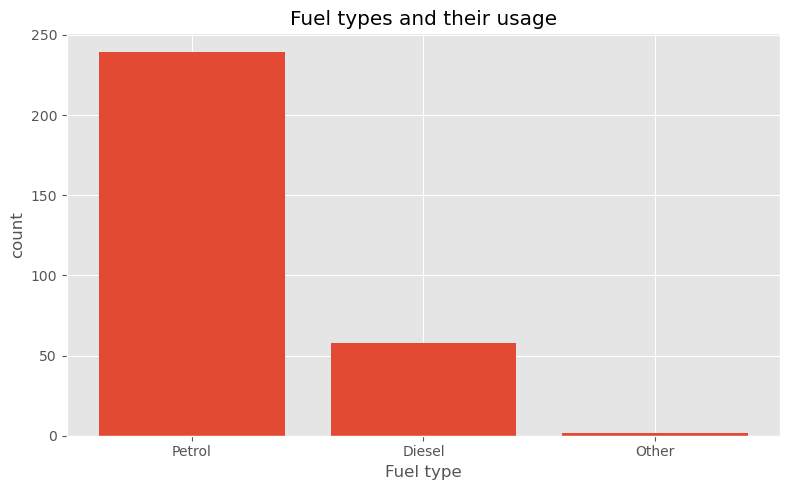

In [13]:
fig,axs=plt.subplots(figsize=(8, 5))
values = [
    len(car_df[car_df["Fuel_Type"] == "Petrol"]),
    len(car_df[car_df["Fuel_Type"] == "Diesel"]),
    len(car_df[(car_df["Fuel_Type"] != "Petrol") & (car_df["Fuel_Type"] != "Diesel")])
]
labels = ["Petrol", "Diesel", "Other"]
plt.bar(labels, values)
plt.xlabel("Fuel type")
plt.ylabel("count")
plt.title("Fuel types and their usage")
plt.tight_layout()
plt.show()

#### Grouped bar chart: Avg Selling Price vs Present Price over Years

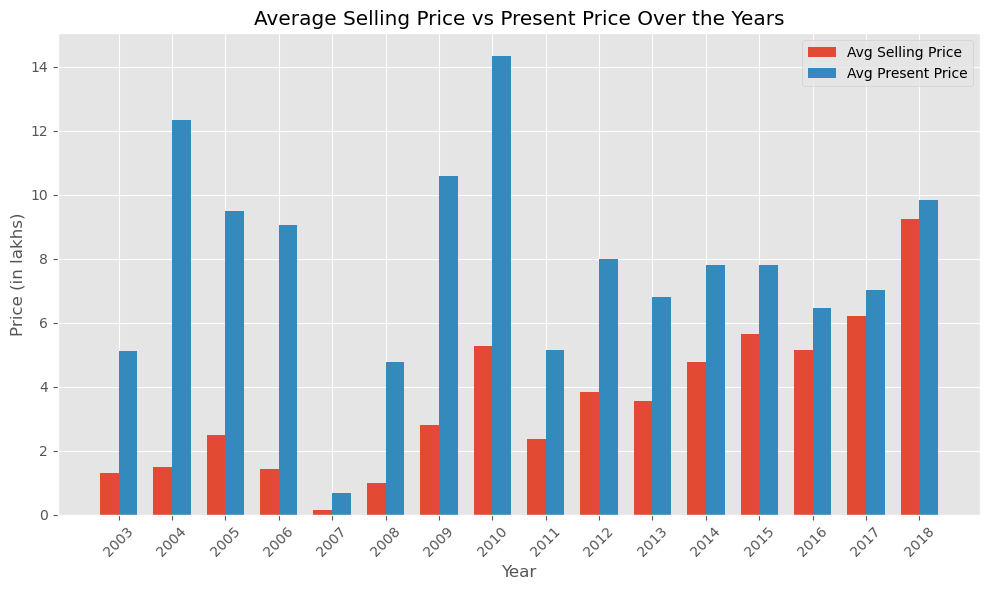

In [15]:
# Calculate averages per year
grouped = car_df.groupby("Year")[["Selling_Price", "Present_Price"]].mean().sort_index()

years = grouped.index.astype(str)
selling_price_avg = grouped["Selling_Price"]
present_price_avg = grouped["Present_Price"]

# Setup positions
x = range(len(years))
w = 0.35  # bar width

# Plot grouped bars
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar([i - w/2 for i in x], selling_price_avg, width=w, label="Avg Selling Price")
ax.bar([i + w/2 for i in x], present_price_avg, width=w, label="Avg Present Price")

ax.set_xticks(x)
ax.set_xticklabels(years, rotation=45)
ax.set_xlabel("Year")
ax.set_ylabel("Price (in lakhs)")
ax.set_title("Average Selling Price vs Present Price Over the Years")
ax.legend()

plt.tight_layout()
plt.show()

### Piecharts

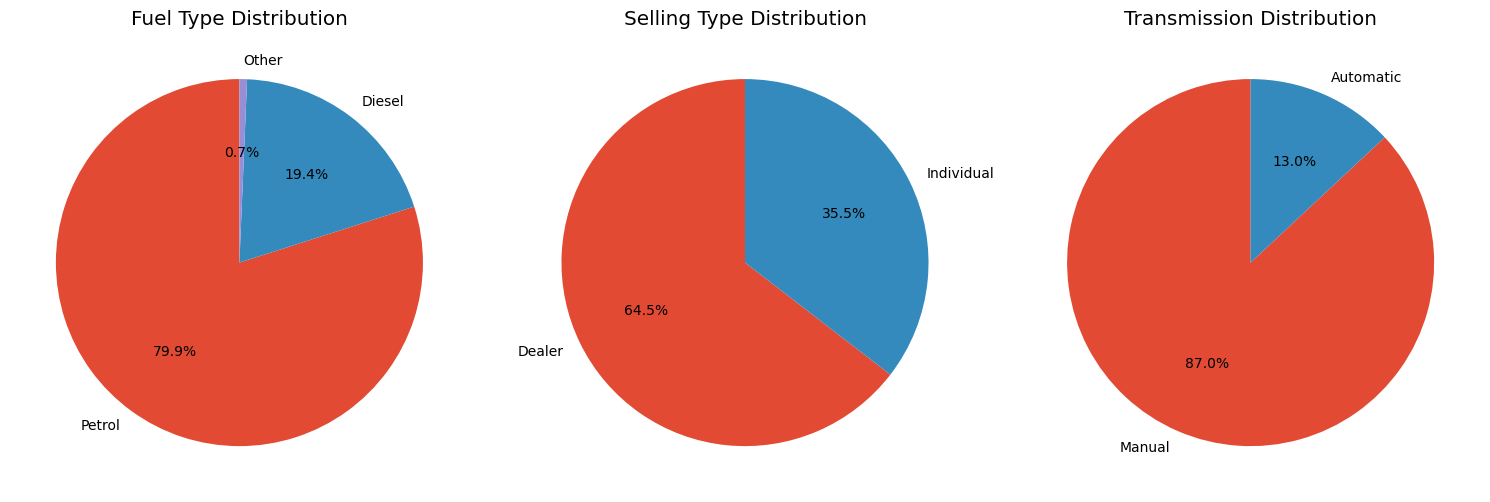

In [18]:
fig,axs1=plt.subplots(1,3)
fig.set_size_inches(15, 5)
#piechart 1
values = [
    len(car_df[car_df["Fuel_Type"] == "Petrol"]),
    len(car_df[car_df["Fuel_Type"] == "Diesel"]),
    len(car_df[(car_df["Fuel_Type"] != "Petrol") & (car_df["Fuel_Type"] != "Diesel")])
]
labels = ["Petrol", "Diesel", "Other"]
axs1[0].pie(values, labels=labels,autopct='%1.1f%%', startangle=90)
axs1[0].set_title("Fuel Type Distribution")

#piechart 2
values = [
    len(car_df[car_df["Selling_type"] == "Dealer"]),
    len(car_df[car_df["Selling_type"] == "Individual"])
]
labels = ["Dealer", "Individual"]
axs1[1].pie(values, labels=labels,autopct='%1.1f%%', startangle=90)
axs1[1].set_title("Selling Type Distribution")

#piechart 3
values = [
    len(car_df[car_df["Transmission"] == "Manual"]),
    len(car_df[car_df["Transmission"] == "Automatic"])
]
labels = ["Manual", "Automatic"]
axs1[2].pie(values, labels=labels,autopct='%1.1f%%', startangle=90)
axs1[2].set_title("Transmission Distribution")

plt.tight_layout()
plt.show()

### Histogram

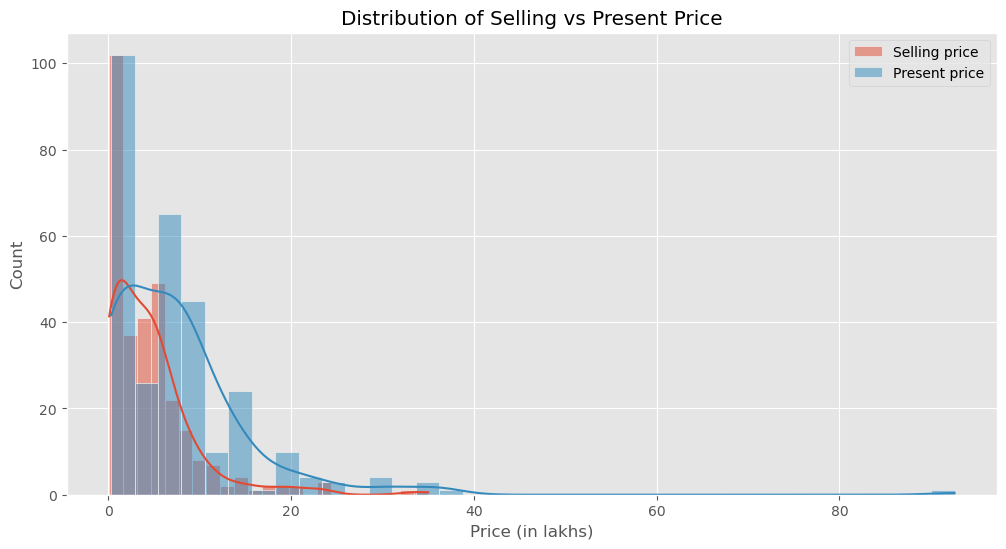

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=car_df, x="Selling_Price", kde=True, label="Selling price")
sns.histplot(data=car_df, x="Present_Price", kde=True, label="Present price")
plt.title("Distribution of Selling vs Present Price")
plt.xlabel("Price (in lakhs)")
plt.ylabel("Count")
plt.legend()

plt.show()

### Boxplot

Text(31.472222222222214, 0.5, 'Kilometers')

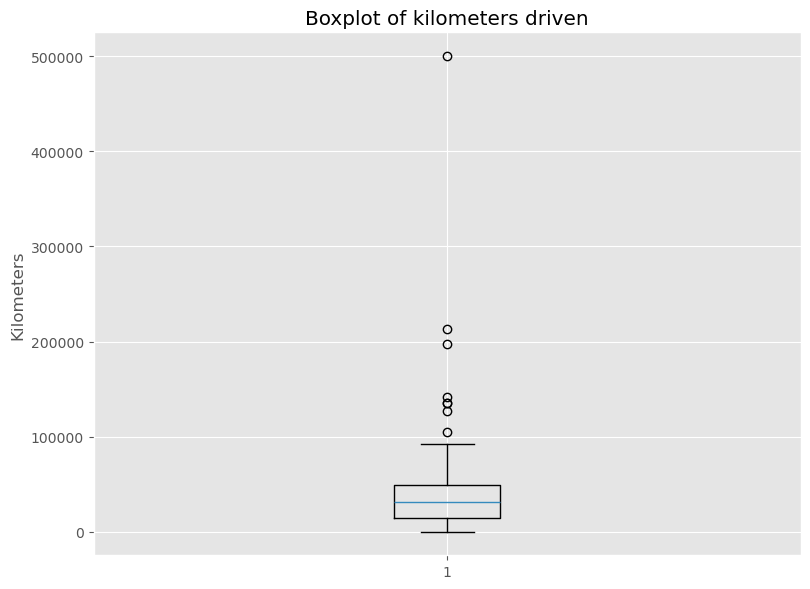

In [23]:
plt.figure(figsize=(8,6))
plt.title("Boxplot of kilometers driven")
plt.boxplot(car_df["Driven_kms"])
plt.tight_layout()
plt.ylabel("Kilometers")

### Scatterplots

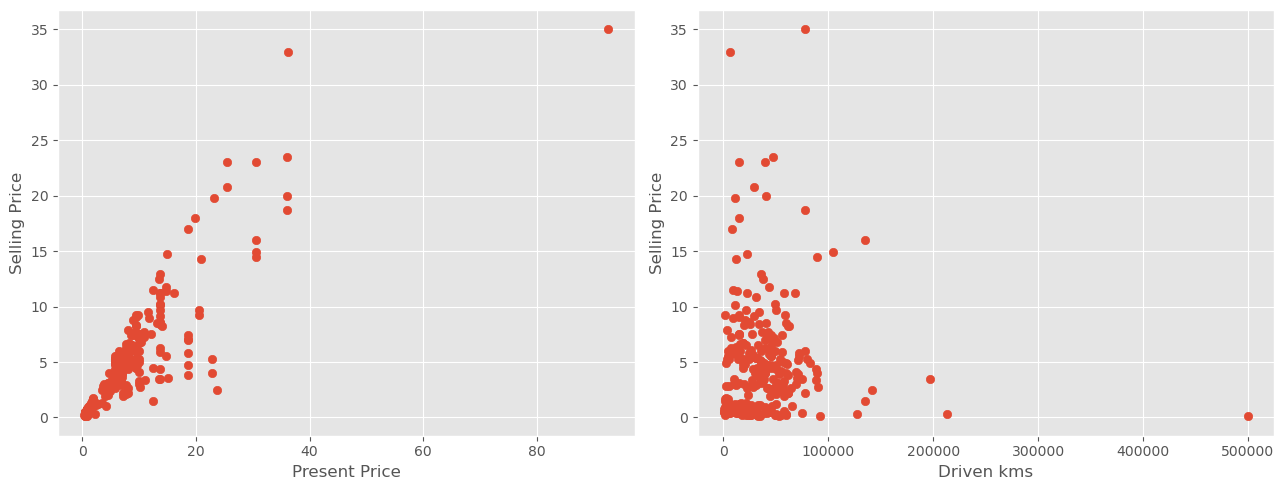

In [28]:
fig,axs2=plt.subplots(1,2)
fig.set_size_inches(13, 5)
axs2[0].scatter(car_df["Present_Price"], car_df["Selling_Price"])
axs2[0].set_xlabel("Present Price")
axs2[0].set_ylabel("Selling Price")
axs2[1].scatter(car_df["Driven_kms"], car_df["Selling_Price"])
axs2[1].set_xlabel("Driven kms")
axs2[1].set_ylabel("Selling Price")
plt.tight_layout()
plt.show()

### Correlation heatmap

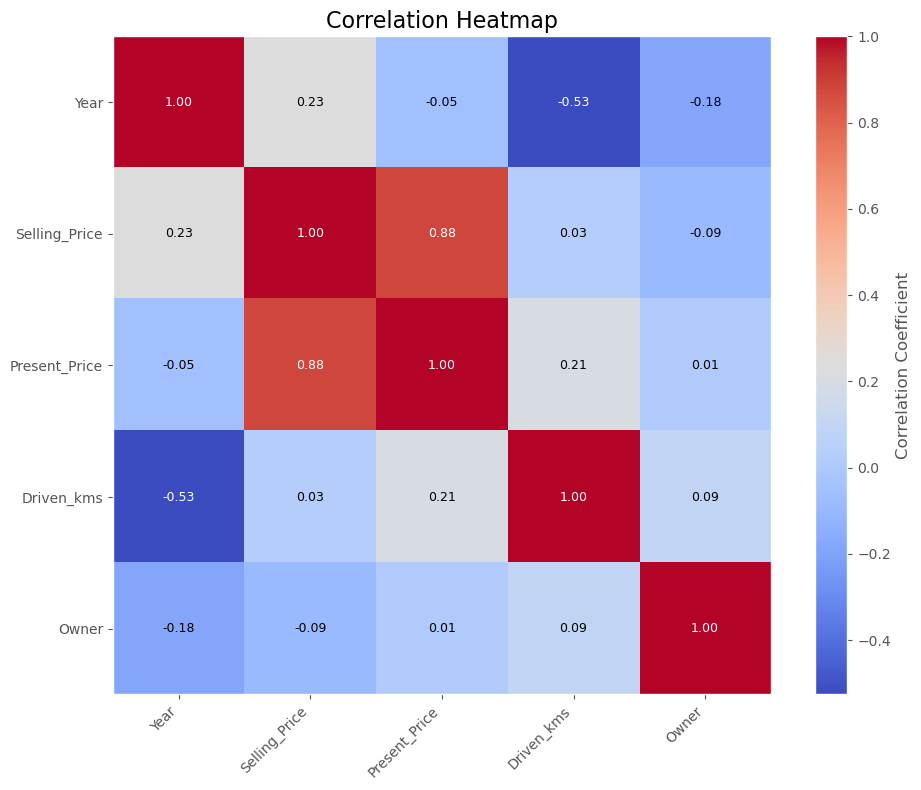

In [32]:
corr = car_df.corr(numeric_only=True)
# Create the plot
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')  
plt.colorbar(label='Correlation Coefficient')

labels = corr.columns
plt.xticks(np.arange(len(labels)), labels, rotation=45, ha='right')
plt.yticks(np.arange(len(labels)), labels)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f'{corr.iloc[i, j]:.2f}', 
                 ha='center', va='center',
                 color='black' if abs(corr.iloc[i, j]) < 0.5 else 'white',
                 fontsize=9)

plt.title('Correlation Heatmap', fontsize=16)

plt.grid(False)

plt.tight_layout()
plt.show()

## Testing linear regression from scratch

### Define feature matrix and target

In [38]:
X = car_df_encoded.drop(["Car_Name", "Selling_Price"], axis=1)
y = car_df_encoded["Selling_Price"]

### Normalize features

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Train model and predict

In [ ]:
w, b, history = lgr.gradient_descent(X_train, y_train.to_numpy(), num_iterations=800, learning_rate=0.05)
predictions = lgr.predict_all(X_test, w, b)

Iteration 0: Cost 29.475672144796615
Iteration 100: Cost 2.404142910317888
Iteration 200: Cost 2.344493921497948
Iteration 300: Cost 2.338522808416333
Iteration 400: Cost 2.337747340219472
Iteration 500: Cost 2.337645133449203
Iteration 600: Cost 2.337631651181914
Iteration 700: Cost 2.3376298726172298


### Metrics

In [40]:
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.4f} ({round(r2 * 100, 2)}%)")

R² Score: 0.7527 (75.27%)


In [41]:
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 1.47


In [42]:
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 6.37


## Testing Sci-kit's linear regression

In [43]:
pipeline= Pipeline([
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

### Metrics

In [44]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f} ({round(r2 * 100, 2)}%)")

R² Score: 0.7527 (75.27%)


In [45]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 1.47


In [46]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 6.37


## Visualizing both models

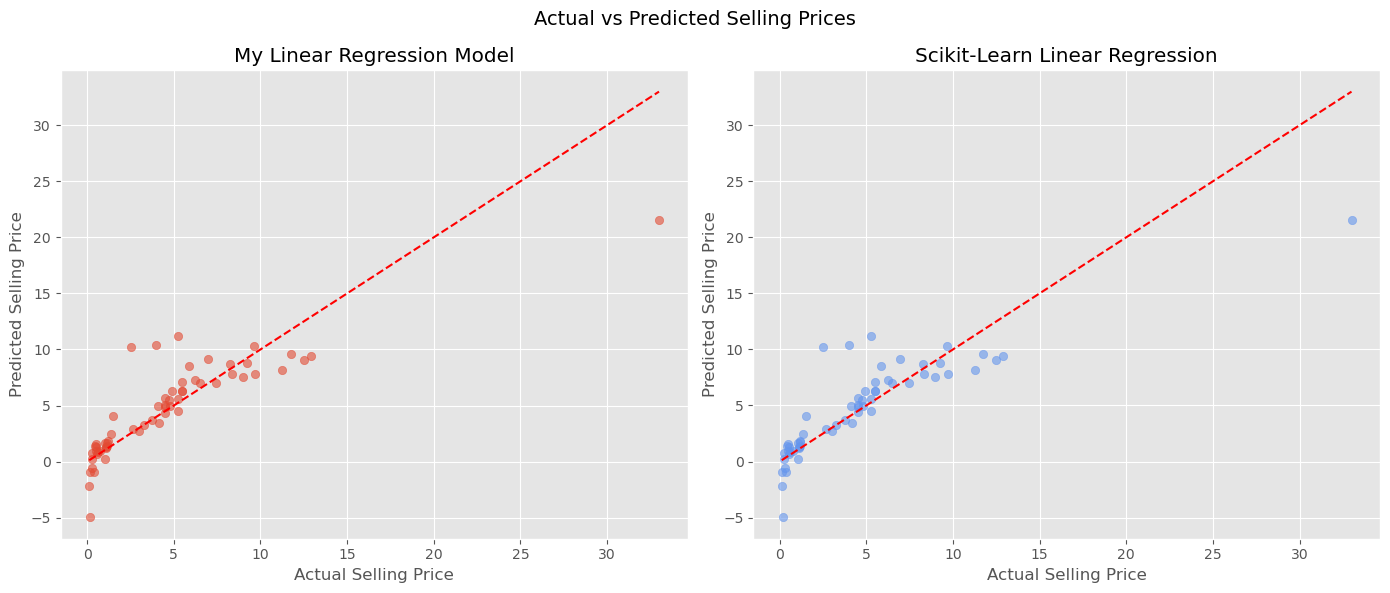

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# My Model
axs[0].scatter(y_test, predictions, alpha=0.6)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axs[0].set_title("My Linear Regression Model")
axs[0].set_xlabel("Actual Selling Price")
axs[0].set_ylabel("Predicted Selling Price")

# Scikit Model
axs[1].scatter(y_test, y_pred, alpha=0.6, color="cornflowerblue")
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axs[1].set_title("Scikit-Learn Linear Regression")
axs[1].set_xlabel("Actual Selling Price")
axs[1].set_ylabel("Predicted Selling Price")

plt.suptitle("Actual vs Predicted Selling Prices", fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()

## Conclusion
